In [26]:
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
import requests
import pickle
import pandas as pd

def dataloader(filename):
    #initial to download the data
    #response = requests.get('https://www.csie.ntu.edu.tw/~htlin/course/mlfound19fall/hw1/hw1_6_train.dat')
    #raw_data = response.text
    #file = open('data.txt','wb')
    #pickle.dump(raw_data,file)

    data = np.genfromtxt(filename)
    row, col = data.shape
    #add 1 at the front of the x
    X = np.c_[np.ones((row, 1)), data[:, 0: col-1]]
    Y = data[:, col-1:col]
    #r,c = X.shape
    #w = np.zeros((c,1))
    #print('num',num)
    return X,Y


def PLA(X,Y,max_times,eta = 1):
    times =0 
    row, col = X.shape
    i = 0 #輪到的數據號碼
    w = np.zeros(col)
    while times < max_times:
        num = np.sum(X.dot(w) * Y[:,0] > 0)
        #print("X",X)
        #print("X.dot(w)",X.dot(w))
        #print("y",Y)
        #print('num',num)
        if num == row:
            break
        dot_answer = X[i,:].dot(w)*Y[i,0]
        if np.sign(dot_answer) <= 0:
            times = times + 1
            w += eta*Y[i]*X[i,:]
        i += 1
    #let i in the range of row
        if i >= row:
            i = i - row
    return times,w

def ErrorRate(X,Y,w):
    num =  np.sum(X.dot(w) * Y[:,0] <= 0)
    row = X.shape[0]
    return num/row

def PocketPLA(X,Y,max_times,eta = 1):
    times = 0
    row, col = X.shape
    i = 0
    w = np.zeros(col)
    wp = np.zeros(col)
    error = ErrorRate(X,Y,w)
    #print('error',error)
    while times < max_times:
        if error == 0:
            break
        dot_answer = X[i,:].dot(w)*Y[i,0]
        if np.sign(dot_answer) <= 0:
            times = times + 1
            w += eta*Y[i]*X[i,:]
            #get present error
            errorp = ErrorRate(X,Y,w)
            #print('errorp',errorp)
            if errorp < error:
                error = errorp
                wp = np.copy(w)
        i = i + 1
        if i >= row:
            i = i - row
    return wp, error

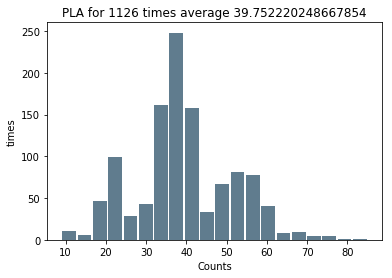

In [31]:
if __name__ == "__main__":
    #problem 6
    Xs,Ys = dataloader('hw1_6_train.txt')
    Times = []
    for _ in range(1126):
        row = Xs.shape[0]
        randseed = np.random.permutation(row)
        Xrnd = Xs[randseed, :]
        Yrnd = Ys[randseed, 0:1]
        times = PLA(Xrnd,Yrnd,np.inf)[0]
        Times.append(times)
    pic = pd.Series(Times)
    pic.plot.hist(bins=20, rwidth=0.9,color='#607c8e')
    plt.title(f'PLA for 1126 times average {np.mean(Times)}')
    plt.xlabel('Counts')
    plt.ylabel('times')
    plt.savefig('problem 6.png')
 

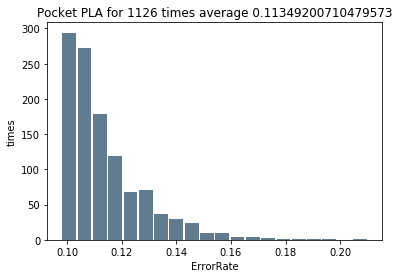

In [28]:
if __name__ == "__main__":
   #problem 7
    Xse,Yse = dataloader('hw1_7_train.txt')
    Xset,Yset = dataloader('hw1_7_test.txt')
    ErrorTimes = []
    row = Xse.shape[0]
    for _ in range(1126):
        randseed = np.random.permutation(row)
        Xrnd = Xse[randseed, :]
        Yrnd = Yse[randseed, :]
        wp = PocketPLA(Xrnd,Yrnd,100,eta=1)[0]
        ErrorTimes.append(ErrorRate(Xset,Yset,wp))
    pics = pd.Series(ErrorTimes)
    pics.plot.hist(bins=20, rwidth=0.9,color='#607c8e')
    plt.title(f'Pocket PLA for 1126 times average {np.mean(ErrorTimes)}')
    plt.xlabel('ErrorRate')
    plt.ylabel('times')
    plt.savefig('problem 7.png')

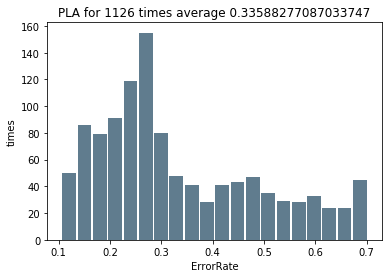

In [33]:
if __name__ == "__main__":
    #problem 8
    Xse,Yse = dataloader('hw1_7_train.txt')
    Xset,Yset = dataloader('hw1_7_test.txt')
    row = Xse.shape[0]
    ErrorRecord = []
    for _ in range(1126):
        randseed = np.random.permutation(row)
        Xrnd = Xse[randseed, :]
        Yrnd = Yse[randseed, :]
        wp = PLA(Xrnd,Yrnd,100,eta=1)[1]
        ErrorRecord.append(ErrorRate(Xset,Yset,wp))
    pice = pd.Series(ErrorRecord)
    pice.plot.hist(bins=20, rwidth=0.9,color='#607c8e')
    plt.title(f'PLA for 1126 times average {np.mean(ErrorRecord)}')
    plt.xlabel('ErrorRate')
    plt.ylabel('times')
    plt.savefig('problem 8.png')